# **Data Profiling**
## **Data Dimensionality**
### Load Data

In [1]:
from pandas import read_csv, DataFrame

filename = '/home/morais/data_science_project/datasets/class_financial distress.csv'
file_tag = "class_financial distress"
data: DataFrame = read_csv(filepath_or_buffer=filename, na_values="", index_col=None, sep=',', decimal='.')
print(data)

      Company  Time  Financial Distress  CLASS      x1        x2       x3  \
0           1     1            0.010636      0  1.2810  0.022934  0.87454   
1           1     2           -0.455970      0  1.2700  0.006454  0.82067   
2           1     3           -0.325390      0  1.0529 -0.059379  0.92242   
3           1     4           -0.566570      1  1.1131 -0.015229  0.85888   
4           2     1            1.357300      0  1.0623  0.107020  0.81460   
...       ...   ...                 ...    ...     ...       ...      ...   
3667      422    10            0.438020      0  2.2605  0.202890  0.16037   
3668      422    11            0.482410      0  1.9615  0.216440  0.20095   
3669      422    12            0.500770      0  1.7099  0.207970  0.26136   
3670      422    13            0.611030      0  1.5590  0.185450  0.30728   
3671      422    14            0.518650      0  1.6148  0.176760  0.36369   

           x4        x5        x6  ...      x74     x75      x76     x77  \

### Ratio between the number of records and variables

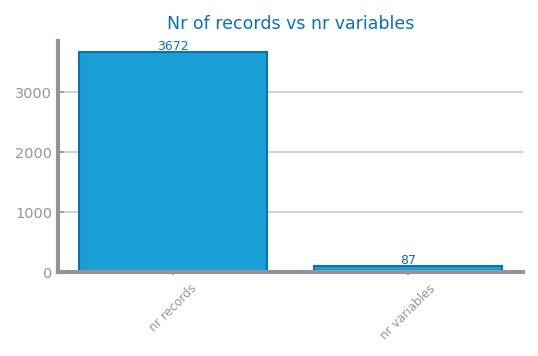

In [2]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": data.shape[0], "nr variables": data.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title="Nr of records vs nr variables"
)
savefig(f"/home/morais/data_science_project/images/{file_tag}_records_variables.png", bbox_inches='tight')
show()

### Missing values

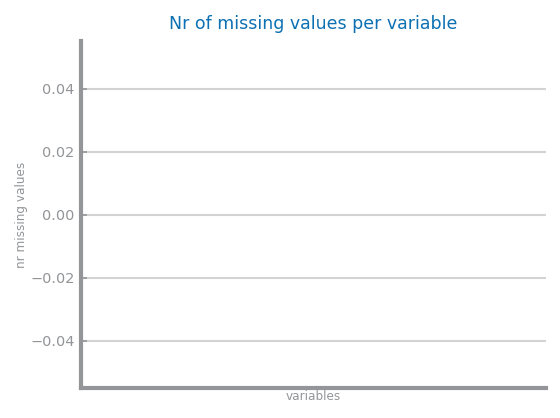

In [3]:
mv: dict[str, int] = {}
for var in data.columns:
    nr: int = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

figure()
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
savefig(f"/home/morais/data_science_project/images/{file_tag}_mv.png", bbox_inches='tight')
show()

### Variables Type

{'numeric': ['Company', 'Time', 'Financial Distress', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83'], 'binary': ['CLASS'], 'date': [], 'symbolic': []}


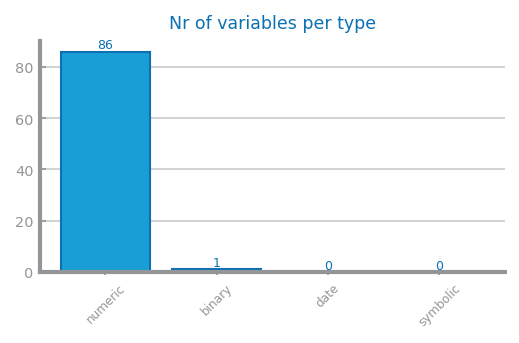

In [4]:
from dslabs_functions import get_variable_types

data.dtypes

variable_types: dict[str, list] = get_variable_types(data)
print(variable_types)
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title="Nr of variables per type"
)
savefig(f"/home/morais/data_science_project/images/{file_tag}_variable_types.png", bbox_inches='tight')
show()

# symbolic: list[str] = variable_types["symbolic"]
# data[symbolic] = data[symbolic].apply(lambda x: x.astype("category"))
# data.dtypes

## **Data Distribution**
### Five-numbers summary 

In [5]:
from pandas import DataFrame, read_csv

filename = '/home/morais/data_science_project/datasets/class_financial distress.csv'
file_tag = "class_financial distress"
data: DataFrame = read_csv(filepath_or_buffer=filename, na_values="", index_col=None, sep=',', decimal='.')
summary5: DataFrame = data.describe(include="all")
summary5

,Company,Time,Financial Distress,CLASS,x1,x2,x3,x4,x5,x6,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,...,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,182.084423,7.528322,1.040257,0.037037,1.387820,0.129706,0.615769,8.681599e-01,0.154949,0.106717,...,86.839822,91.920506,89.115908,17.780855,15.198708,-2.664305,19.714597,1.100488,13.122277,33.044935
std,117.024636,4.064016,2.652227,0.188878,1.452926,0.120013,0.177904,5.719519e-01,0.124904,0.210555,...,16.706209,64.656504,64.349382,2.040152,2.828648,8.192663,7.508588,2.666733,9.465907,13.714563
min,1.000000,1.000000,-8.631700,0.000000,0.075170,-0.258080,0.016135,5.350000e-07,-0.269790,-0.627750,...,54.806000,24.318000,23.776000,15.250000,12.000000,-20.200000,1.000000,-0.499220,1.000000,2.000000
25%,80.000000,4.000000,0.172275,0.000000,0.952145,0.048701,0.501888,5.525575e-01,0.070001,-0.027754,...,79.951000,39.800000,38.377000,16.000000,13.000000,-7.000000,14.000000,0.189912,6.000000,21.000000
50%,168.000000,7.000000,0.583805,0.000000,1.183600,0.107530,0.638690,7.752450e-01,0.131830,0.104325,...,90.000000,66.120000,59.471000,17.000000,14.500000,0.200000,20.000000,0.594765,11.000000,34.000000
75%,264.250000,11.000000,1.351750,0.000000,1.506475,0.188685,0.749425,1.039000e+00,0.219570,0.231230,...,93.883000,130.500000,132.400000,20.000000,16.000000,2.100000,26.000000,1.355050,17.000000,44.000000
max,422.000000,14.000000,128.400000,1.000000,51.954000,0.749410,0.967900,6.835600e+00,0.858540,0.929550,...,120.870000,227.500000,214.500000,22.000000,22.000000,8.600000,37.000000,128.400000,49.000000,74.000000


In [6]:
var: str = "x1"
print(f"Summary for {var} variable:")
print("\tCount: ", summary5[var]["count"])
print("\tMean: ", summary5[var]["mean"])
print("\tStDev: ", summary5[var]["std"])
print("\tMin: ", summary5[var]["min"])
print("\tQ1: ", summary5[var]["25%"])
print("\tMedian: ", summary5[var]["50%"])
print("\tQ3: ", summary5[var]["75%"])
print("\tMax: ", summary5[var]["max"])

Summary for x1 variable:
	Count:  3672.0
	Mean:  1.3878197167755992
	StDev:  1.4529259026155565
	Min:  0.07517
	Q1:  0.952145
	Median:  1.1836
	Q3:  1.506475
	Max:  51.954


### Numeric Variables
#### Boxplots

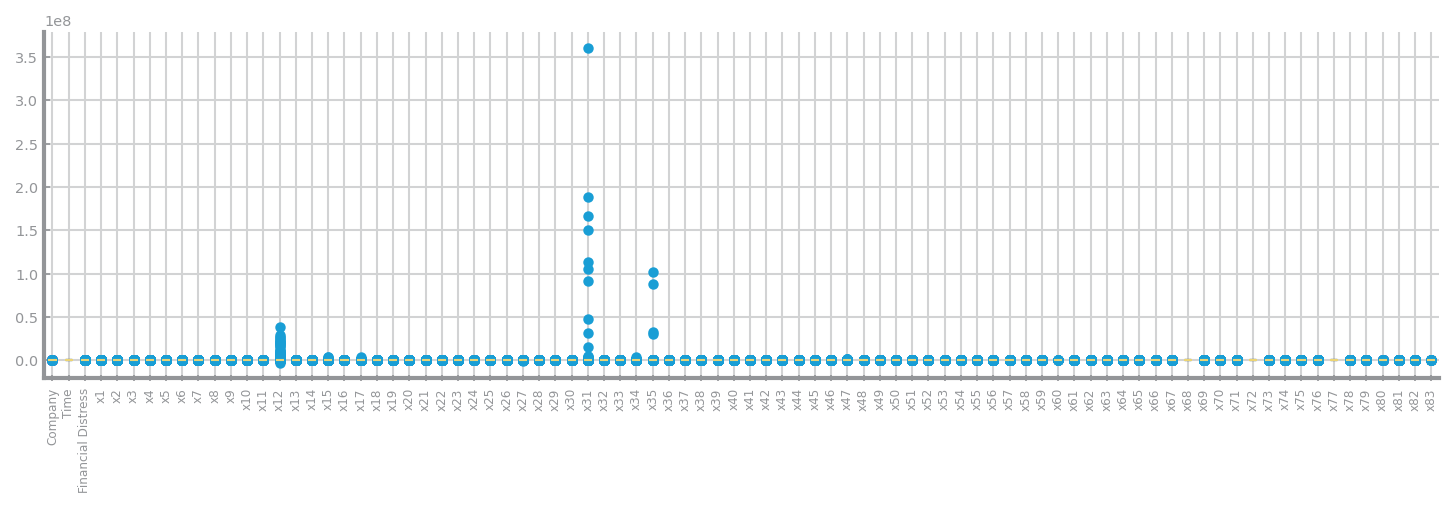

In [7]:
from matplotlib.pyplot import savefig, show
from dslabs_functions import get_variable_types

variables_types: dict[str, list] = get_variable_types(data)
numeric: list[str] = variables_types["numeric"]
if [] != numeric:
    data[numeric].boxplot(rot=90, figsize=(12,3))
    savefig(f"/home/morais/data_science_project/images/{file_tag}_global_boxplot.png", bbox_inches='tight')
    show()
else:
    print("There are no numeric variables.")

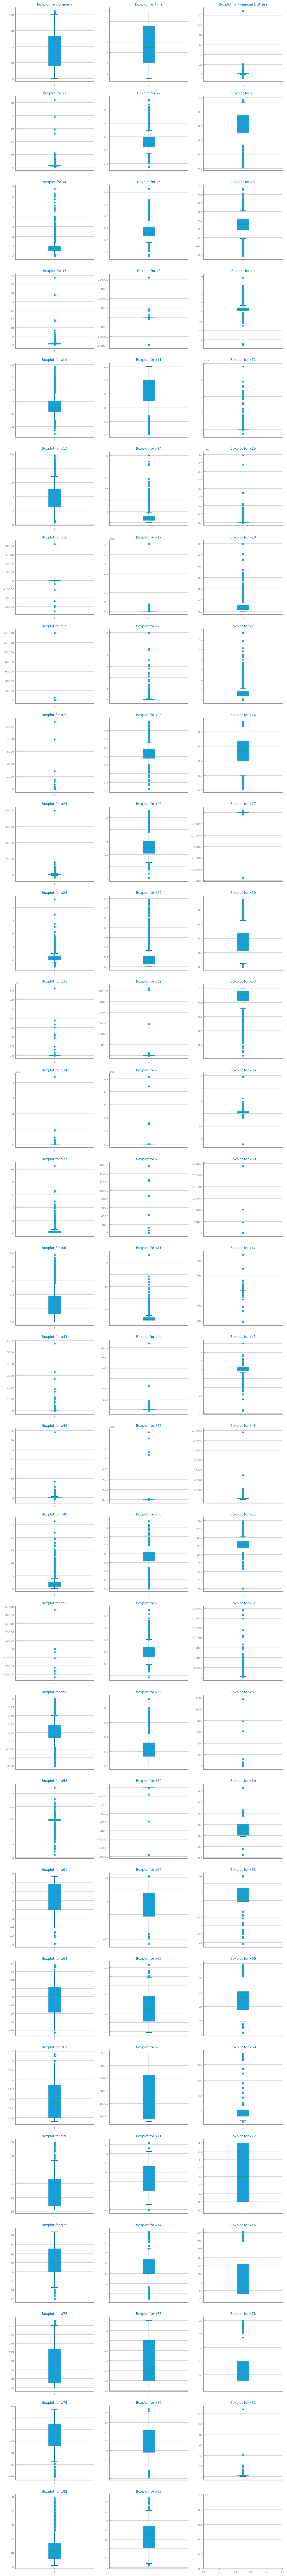

In [8]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT

if [] != numeric:
    rows: int
    cols: int
    rows, cols = define_grid(len(numeric))
    fig: Figure
    axs: ndarray
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(numeric)):
        axs[i, j].set_title("Boxplot for %s" % numeric[n])
        axs[i, j].boxplot(data[numeric[n]].dropna().values)
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"/home/morais/data_science_project/images/{file_tag}_single_boxplots.png", bbox_inches='tight')
    show()
else:
    print("There are no numeric variables.")

#### Barplots

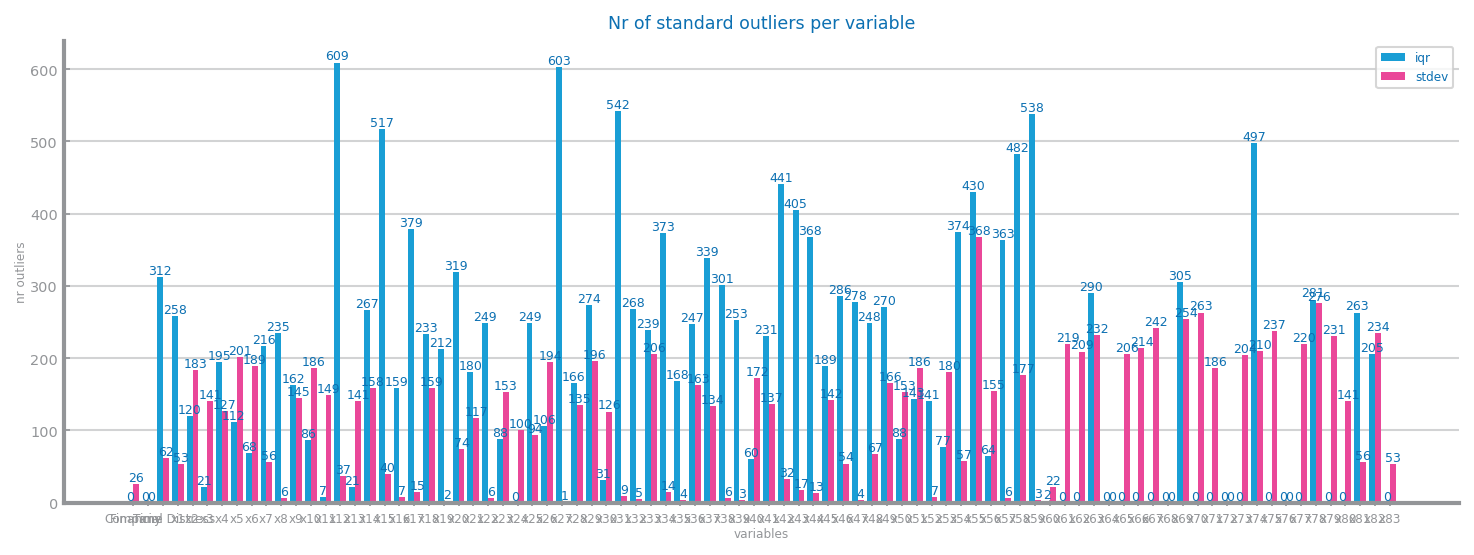

In [13]:
from pandas import Series
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_multibar_chart

NR_STDEV: int = 2
IQR_FACTOR: float = 1.5


def determine_outlier_thresholds_for_var(
    summary5: Series, std_based: bool = True, threshold: float = NR_STDEV
) -> tuple[float, float]:
    top: float = 0
    bottom: float = 0
    if std_based:
        std: float = threshold * summary5["std"]
        top = summary5["mean"] + std
        bottom = summary5["mean"] - std
    else:
        iqr: float = threshold * (summary5["75%"] - summary5["25%"])
        top = summary5["75%"] + iqr
        bottom = summary5["25%"] - iqr

    return top, bottom


def count_outliers(
    data: DataFrame,
    numeric: list[str],
    nrstdev: int = NR_STDEV,
    iqrfactor: float = IQR_FACTOR,
) -> dict:
    outliers_iqr: list = []
    outliers_stdev: list = []
    summary5: DataFrame = data[numeric].describe()

    for var in numeric:
        top: float
        bottom: float
        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=True, threshold=nrstdev
        )
        outliers_stdev += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=False, threshold=iqrfactor
        )
        outliers_iqr += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

    return {"iqr": outliers_iqr, "stdev": outliers_stdev}


if [] != numeric:
    outliers: dict[str, int] = count_outliers(data, numeric)
    figure(figsize=(12, HEIGHT))
    plot_multibar_chart(
        numeric,
        outliers,
        title="Nr of standard outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    savefig(f"/home/morais/data_science_project/images/{file_tag}_outliers_standard.png", bbox_inches='tight')
    show()
else:
    print("There are no numeric variables.")

In [ ]:
if [] != numeric:
    outliers: dict[str, int] = count_outliers(data, numeric, nrstdev=4, iqrfactor=4.5)
    figure(figsize=(12, HEIGHT))
    plot_multibar_chart(
        numeric,
        outliers,
        title="Nr of outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    savefig(f"/home/morais/data_science_project/images/{file_tag}_outliers.png", bbox_inches='tight')
    show()
else:
    print("There are no numeric variables.")

### Histograms

In [1]:
import numpy as np
import matplotlib
matplotlib.use('Agg')  # Use a non-interactive backend since we don't display plots
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import gc  # Import garbage collector
import re  # Import regular expressions
from pandas import DataFrame, Series
from matplotlib.pyplot import savefig, subplots
from dslabs_functions import set_chart_labels, get_variable_types

# Constants
HEIGHT = 4
NR_COLUMNS = 3  # Adjust as needed
file_tag = "class_financial_distress"  # Replace with your actual file tag

# Load your data
# Replace this with your actual data loading code
from pandas import read_csv
filename = "../class_financial distress.csv"
data: DataFrame = read_csv(filename, na_values="")

# Get variable types automatically
variable_types = get_variable_types(data)
numeric_vars = variable_types.get("numeric", [])
categorical_vars = variable_types.get("categorical", [])
date_vars = variable_types.get("date", [])
binary_vars = variable_types.get("binary", [])

# Combine all variables into a single list
all_vars = data.columns.tolist()

# Function to remove outliers using IQR method
def remove_outliers_iqr(data_series: Series, factor: float = 1.5) -> Series:
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (factor * IQR)
    upper_bound = Q3 + (factor * IQR)
    return data_series[(data_series >= lower_bound) & (data_series <= upper_bound)]

# Function to define grid
def define_grid(nr_vars, vars_per_row: int = NR_COLUMNS) -> tuple[int, int]:
    nr_rows: int = (nr_vars + vars_per_row - 1) // vars_per_row
    return nr_rows, vars_per_row

# Natural sorting function for variable names
def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    '''
    return [int(c) if c.isdigit() else c for c in re.split(r'(\d+)', text)]

# Sort all variables naturally
all_vars.sort(key=natural_keys)

if all_vars:
    # Determine grid size
    rows, cols = define_grid(len(all_vars), vars_per_row=NR_COLUMNS)
    
    # Create subplots
    fig, axs = plt.subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    axs_flat = axs.flatten()
    
    # Loop over all variables
    for idx, var_name in enumerate(all_vars):
        variable_data = data[var_name].dropna()
        ax = axs_flat[idx]
        
        # Check variable type and process accordingly
        if var_name in numeric_vars:
            # Numeric variable
            clean_data = remove_outliers_iqr(variable_data, factor=1.5)
            if not clean_data.empty:
                set_chart_labels(
                    ax,
                    title=f"Histogram for {var_name}",
                    xlabel=var_name,
                    ylabel="Number of Records",
                )
                ax.hist(clean_data.values, bins="auto", edgecolor='black')
            else:
                print(f"No data to plot for {var_name} after outlier removal.")
                ax.text(
                    0.5,
                    0.5,
                    f"No data for {var_name}",
                    horizontalalignment="center",
                    verticalalignment="center",
                    transform=ax.transAxes,
                )
                ax.set_axis_off()
        elif var_name in categorical_vars or var_name in binary_vars:
            # Categorical or binary variable
            counts = variable_data.value_counts()
            if not counts.empty:
                set_chart_labels(
                    ax,
                    title=f"Bar Chart for {var_name}",
                    xlabel=var_name,
                    ylabel="Frequency",
                )
                counts.plot.bar(ax=ax, edgecolor='black')
            else:
                print(f"No data to plot for {var_name}.")
                ax.text(
                    0.5,
                    0.5,
                    f"No data for {var_name}",
                    horizontalalignment="center",
                    verticalalignment="center",
                    transform=ax.transAxes,
                )
                ax.set_axis_off()
        elif var_name in date_vars:
            # Date variable
            # Convert to datetime if not already
            variable_data = data[var_name]
            if not np.issubdtype(variable_data.dtype, np.datetime64):
                variable_data = pandas.to_datetime(variable_data, errors='coerce')
            variable_data = variable_data.dropna()
            if not variable_data.empty:
                set_chart_labels(
                    ax,
                    title=f"Time Series for {var_name}",
                    xlabel="Date",
                    ylabel="Frequency",
                )
                variable_data.value_counts().sort_index().plot(ax=ax)
            else:
                print(f"No data to plot for {var_name}.")
                ax.text(
                    0.5,
                    0.5,
                    f"No data for {var_name}",
                    horizontalalignment="center",
                    verticalalignment="center",
                    transform=ax.transAxes,
                )
                ax.set_axis_off()
        else:
            # Unknown variable type
            print(f"Variable {var_name} type is not recognized.")
            ax.text(
                0.5,
                0.5,
                f"Cannot plot {var_name}",
                horizontalalignment="center",
                verticalalignment="center",
                transform=ax.transAxes,
            )
            ax.set_axis_off()
    
    # Hide any unused subplots
    for idx in range(len(all_vars), len(axs_flat)):
        axs_flat[idx].set_visible(False)
    
    fig.tight_layout()
    plt.savefig(f"/home/morais/data_science_project/images/{file_tag}_histograms.png", bbox_inches="tight")
    plt.close(fig)
    gc.collect()
else:
    print("There are no variables to process.")

FileNotFoundError: [Errno 2] No such file or directory: '../class_financial distress.csv'

### Distributions

In [ ]:
from numpy import log
from pandas import Series
from scipy.stats import norm, expon, lognorm
from matplotlib.axes import Axes
from dslabs_functions import plot_multiline_chart


def compute_known_distributions(x_values: list) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = norm.fit(x_values)
    distributions["Normal(%.1f,%.2f)" % (mean, sigma)] = norm.pdf(x_values, mean, sigma)
    # Exponential
    loc, scale = expon.fit(x_values)
    distributions["Exp(%.2f)" % (1 / scale)] = expon.pdf(x_values, loc, scale)
    # LogNorm
    sigma, loc, scale = lognorm.fit(x_values)
    distributions["LogNor(%.1f,%.2f)" % (log(scale), sigma)] = lognorm.pdf(
        x_values, sigma, loc, scale
    )
    return distributions


def histogram_with_distributions(ax: Axes, series: Series, var: str):
    values: list = series.sort_values().to_list()
    ax.hist(values, 20, density=True)
    distributions: dict = compute_known_distributions(values)
    plot_multiline_chart(
        values,
        distributions,
        ax=ax,
        title="Best fit for %s" % var,
        xlabel=var,
        ylabel="",
    )


if [] != numeric:
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(numeric)):
        histogram_with_distributions(axs[i, j], data[numeric[n]].dropna(), numeric[n])
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"/home/morais/data_science_project/images/{file_tag}_histogram_numeric_distribution.png")
    show()
else:
    print("There are no numeric variables.")

In [ ]:
from dslabs_functions import plot_bar_chart

target = "CLASS"

values: Series = data[target].value_counts()
print(values)

figure(figsize=(4, 2))
plot_bar_chart(
    values.index.to_list(),
    values.to_list(),
    title=f"Target distribution (target={target})",
)
savefig(f"/home/morais/data_science_project/images/{file_tag}_class_distribution.png")
show()

## **Data Granularity**

We are dealing with numeric data so no need for granularity

## **Sparsity**
0 to 19

In [ ]:
from numpy import ndarray
from pandas import read_csv, DataFrame
from matplotlib.figure import Figure
from matplotlib.pyplot import figure, subplots, savefig, show
from dslabs_functions import HEIGHT, plot_multi_scatters_chart

filename = '/home/morais/data_science_project/datasets/class_financial distress.csv'
file_tag = "class_financial distress"
data: DataFrame = read_csv(filepath_or_buffer=filename, na_values="", index_col=None, sep=',', decimal='.')
data = data.dropna()

# Select first 100 rows and first 3 columns
data = data.iloc[:, :23]

vars: list = data.columns.to_list()

if [] != vars:
    target = "CLASS"

    n: int = len(vars) - 1
    fig, axs = subplots(n, n, figsize=(n * HEIGHT, n * HEIGHT), squeeze=False)
    for i in range(len(vars)):
        var1: str = vars[i]
        for j in range(i + 1, len(vars)):
            var2: str = vars[j]
            plot_multi_scatters_chart(data, var1, var2, target, ax=axs[i, j - 1])
    savefig(f"/home/morais/data_science_project/images/{file_tag}_sparsity_study.png", bbox_inches='tight')
    # show()
else:
    print("Sparsity per class: there are no variables.")

0 to 19 with 20 to 40

In [ ]:
from numpy import ndarray
from pandas import read_csv, DataFrame
from matplotlib.pyplot import subplots, savefig

filename = '/home/morais/data_science_project/datasets/class_financial distress.csv'
file_tag = "class_financial distress"
data: DataFrame = read_csv(filepath_or_buffer=filename, na_values="", index_col=None, sep=',', decimal='.')
data = data.dropna()

# Split dataset into first and second groups of columns
cols1 = data.columns[:23]  # First 22 columns (already plotted)
cols2 = data.columns[23:44]  # Next 22 columns (new plots)
print(cols2)

# Ensure the column at index 4 is included at the beginning of the second partition
cols2 = [data.columns[4]] + [col for col in cols2 if col != data.columns[4]]

if cols2:
    target = "CLASS"

    # Define dimensions for the grid of subplots
    n: int = len(cols1)
    m: int = len(cols2)
    fig, axs = subplots(n, m, figsize=(m * HEIGHT, n * HEIGHT), squeeze=False)

    for i, var1 in enumerate(cols1):
        for j, var2 in enumerate(cols2):
            plot_multi_scatters_chart(data, var1, var2, target, ax=axs[i, j])

    savefig(f"/home/morais/data_science_project/images/{file_tag}_sparsity_study_part2.png", bbox_inches='tight')
else:
    print("No additional variables for plotting.")


0 to 19 with 41 to 61

In [ ]:
from numpy import ndarray
from pandas import read_csv, DataFrame
from matplotlib.pyplot import subplots, savefig

filename = '/home/morais/data_science_project/datasets/class_financial distress.csv'
file_tag = "class_financial distress"
data: DataFrame = read_csv(filepath_or_buffer=filename, na_values="", index_col=None, sep=',', decimal='.')
data = data.dropna()

# Split dataset into first and second groups of columns
cols1 = data.columns[:23]  # First 22 columns (already plotted)
cols2 = data.columns[44:65]  # Next 22 columns (new plots)
print(cols1)
print(cols2)

# Ensure the column at index 4 is included at the beginning of the second partition
cols2 = [data.columns[4]] + [col for col in cols2 if col != data.columns[4]]

if cols2:
    target = "CLASS"

    # Define dimensions for the grid of subplots
    n: int = len(cols1)
    m: int = len(cols2)
    fig, axs = subplots(n, m, figsize=(m * HEIGHT, n * HEIGHT), squeeze=False)

    for i, var1 in enumerate(cols1):
        for j, var2 in enumerate(cols2):
            plot_multi_scatters_chart(data, var1, var2, target, ax=axs[i, j])

    savefig(f"/home/morais/data_science_project/images/{file_tag}_sparsity_study_part3.png", bbox_inches='tight')
else:
    print("No additional variables for plotting.")


0 to 19 with 62 to 83

In [ ]:
from numpy import ndarray
from pandas import read_csv, DataFrame
from matplotlib.pyplot import subplots, savefig

filename = '/home/morais/data_science_project/datasets/class_financial distress.csv'
file_tag = "class_financial distress"
data: DataFrame = read_csv(filepath_or_buffer=filename, na_values="", index_col=None, sep=',', decimal='.')
data = data.dropna()

# Split dataset into first and second groups of columns
cols1 = data.columns[:23]  # First 22 columns (already plotted)
cols2 = data.columns[65:]  # Next 22 columns (new plots)
print(cols2)

# Ensure the column at index 4 is included at the beginning of the second partition
cols2 = [data.columns[4]] + [col for col in cols2 if col != data.columns[4]]

if cols2:
    target = "CLASS"

    # Define dimensions for the grid of subplots
    n: int = len(cols1)
    m: int = len(cols2)
    fig, axs = subplots(n, m, figsize=(m * HEIGHT, n * HEIGHT), squeeze=False)

    for i, var1 in enumerate(cols1):
        for j, var2 in enumerate(cols2):
            plot_multi_scatters_chart(data, var1, var2, target, ax=axs[i, j])

    savefig(f"/home/morais/data_science_project/images/{file_tag}_sparsity_study_part4.png", bbox_inches='tight')
else:
    print("No additional variables for plotting.")


20 to 40

In [ ]:
from numpy import ndarray
from pandas import read_csv, DataFrame
from matplotlib.figure import Figure
from matplotlib.pyplot import figure, subplots, savefig, show
from dslabs_functions import HEIGHT, plot_multi_scatters_chart

filename = '/home/morais/data_science_project/datasets/class_financial distress.csv'
file_tag = "class_financial distress"
data: DataFrame = read_csv(filepath_or_buffer=filename, na_values="", index_col=None, sep=',', decimal='.')
data = data.dropna()

# Select the columns from index 23 to 44
data_subset = data.iloc[:, 23:44]

# Add the fourth column (index 3) to the beginning
column4 = data.iloc[:, 3]
data_subset.insert(0, column4.name, column4)  # Insert column at the start

vars: list = data_subset.columns.to_list()

if [] != vars:
    target = "CLASS"

    n: int = len(vars) - 1
    fig, axs = subplots(n, n, figsize=(n * HEIGHT, n * HEIGHT), squeeze=False)
    for i in range(len(vars)):
        var1: str = vars[i]
        for j in range(i + 1, len(vars)):
            var2: str = vars[j]
            plot_multi_scatters_chart(data_subset, var1, var2, target, ax=axs[i, j - 1])
    savefig(f"/home/morais/data_science_project/images/{file_tag}_sparsity_study_part5.png", bbox_inches='tight')
    # show()
else:
    print("Sparsity per class: there are no variables.")

20 to 40 with 41 to 61

In [ ]:
from numpy import ndarray
from pandas import read_csv, DataFrame
from matplotlib.pyplot import subplots, savefig

filename = '/home/morais/data_science_project/datasets/class_financial distress.csv'
file_tag = "class_financial distress"
data: DataFrame = read_csv(filepath_or_buffer=filename, na_values="", index_col=None, sep=',', decimal='.')
data = data.dropna()

# Split dataset into first and second groups of columns
cols1 = data.columns[23:44]  # First 22 columns (already plotted)
cols2 = data.columns[44:65]  # Next 22 columns (new plots)
print(cols1)
print(cols2)

# Ensure the column at index 4 is included at the beginning of the second partition
cols1 = [data.columns[4]] + [col for col in cols1 if col != data.columns[4]]

if cols1:
    target = "CLASS"

    # Define dimensions for the grid of subplots
    n: int = len(cols1)
    m: int = len(cols2)
    fig, axs = subplots(n, m, figsize=(m * HEIGHT, n * HEIGHT), squeeze=False)

    for i, var1 in enumerate(cols1):
        for j, var2 in enumerate(cols2):
            plot_multi_scatters_chart(data, var1, var2, target, ax=axs[i, j])

    savefig(f"/home/morais/data_science_project/images/{file_tag}_sparsity_study_part6.png", bbox_inches='tight')
else:
    print("No additional variables for plotting.")


20 to 40 with 62 to 83

In [ ]:
from numpy import ndarray
from pandas import read_csv, DataFrame
from matplotlib.pyplot import subplots, savefig

filename = '/home/morais/data_science_project/datasets/class_financial distress.csv'
file_tag = "class_financial distress"
data: DataFrame = read_csv(filepath_or_buffer=filename, na_values="", index_col=None, sep=',', decimal='.')
data = data.dropna()

# Split dataset into first and second groups of columns
cols1 = data.columns[23:44]  # First 22 columns (already plotted)
cols2 = data.columns[65:]  # Next 22 columns (new plots)
print(cols1)
print(cols2)

# Ensure the column at index 4 is included at the beginning of the second partition
cols1 = [data.columns[4]] + [col for col in cols1 if col != data.columns[4]]

if cols1:
    target = "CLASS"

    # Define dimensions for the grid of subplots
    n: int = len(cols1)
    m: int = len(cols2)
    fig, axs = subplots(n, m, figsize=(m * HEIGHT, n * HEIGHT), squeeze=False)

    for i, var1 in enumerate(cols1):
        for j, var2 in enumerate(cols2):
            plot_multi_scatters_chart(data, var1, var2, target, ax=axs[i, j])

    savefig(f"/home/morais/data_science_project/images/{file_tag}_sparsity_study_part7.png", bbox_inches='tight')
else:
    print("No additional variables for plotting.")


41 to 61

In [ ]:
from numpy import ndarray
from pandas import read_csv, DataFrame
from matplotlib.figure import Figure
from matplotlib.pyplot import figure, subplots, savefig, show
from dslabs_functions import HEIGHT, plot_multi_scatters_chart

filename = '/home/morais/data_science_project/datasets/class_financial distress.csv'
file_tag = "class_financial distress"
data: DataFrame = read_csv(filepath_or_buffer=filename, na_values="", index_col=None, sep=',', decimal='.')
data = data.dropna()

# Select the columns from index 23 to 44
data_subset = data.iloc[:, 44:65]

# Add the fourth column (index 3) to the beginning
column4 = data.iloc[:, 3]
data_subset.insert(0, column4.name, column4)  # Insert column at the start

vars: list = data_subset.columns.to_list()

if [] != vars:
    target = "CLASS"

    n: int = len(vars) - 1
    fig, axs = subplots(n, n, figsize=(n * HEIGHT, n * HEIGHT), squeeze=False)
    for i in range(len(vars)):
        var1: str = vars[i]
        for j in range(i + 1, len(vars)):
            var2: str = vars[j]
            plot_multi_scatters_chart(data_subset, var1, var2, target, ax=axs[i, j - 1])
    savefig(f"/home/morais/data_science_project/images/{file_tag}_sparsity_study_part8.png", bbox_inches='tight')
    # show()
else:
    print("Sparsity per class: there are no variables.")

41 to 61 with 62 to 83

In [ ]:
from numpy import ndarray
from pandas import read_csv, DataFrame
from matplotlib.pyplot import subplots, savefig

filename = '/home/morais/data_science_project/datasets/class_financial distress.csv'
file_tag = "class_financial distress"
data: DataFrame = read_csv(filepath_or_buffer=filename, na_values="", index_col=None, sep=',', decimal='.')
data = data.dropna()

# Split dataset into first and second groups of columns
cols1 = data.columns[44:65]  # First 22 columns (already plotted)
cols2 = data.columns[65:]  # Next 22 columns (new plots)
print(cols1)
print(cols2)

# Ensure the column at index 4 is included at the beginning of the second partition
cols1 = [data.columns[4]] + [col for col in cols1 if col != data.columns[4]]

if cols1:
    target = "CLASS"

    # Define dimensions for the grid of subplots
    n: int = len(cols1)
    m: int = len(cols2)
    fig, axs = subplots(n, m, figsize=(m * HEIGHT, n * HEIGHT), squeeze=False)

    for i, var1 in enumerate(cols1):
        for j, var2 in enumerate(cols2):
            plot_multi_scatters_chart(data, var1, var2, target, ax=axs[i, j])

    savefig(f"/home/morais/data_science_project/images/{file_tag}_sparsity_study_part9.png", bbox_inches='tight')
else:
    print("No additional variables for plotting.")


62 to 83

In [ ]:
from numpy import ndarray
from pandas import read_csv, DataFrame
from matplotlib.figure import Figure
from matplotlib.pyplot import figure, subplots, savefig, show
from dslabs_functions import HEIGHT, plot_multi_scatters_chart

filename = '/home/morais/data_science_project/datasets/class_financial distress.csv'
file_tag = "class_financial distress"
data: DataFrame = read_csv(filepath_or_buffer=filename, na_values="", index_col=None, sep=',', decimal='.')
data = data.dropna()

# Select the columns from index 23 to 44
data_subset = data.iloc[:, 65:]

# Add the fourth column (index 3) to the beginning
column4 = data.iloc[:, 3]
data_subset.insert(0, column4.name, column4)  # Insert column at the start

vars: list = data_subset.columns.to_list()

if [] != vars:
    target = "CLASS"

    n: int = len(vars) - 1
    fig, axs = subplots(n, n, figsize=(n * HEIGHT, n * HEIGHT), squeeze=False)
    for i in range(len(vars)):
        var1: str = vars[i]
        for j in range(i + 1, len(vars)):
            var2: str = vars[j]
            plot_multi_scatters_chart(data_subset, var1, var2, target, ax=axs[i, j - 1])
    savefig(f"/home/morais/data_science_project/images/{file_tag}_sparsity_study_part10.png", bbox_inches='tight')
    # show()
else:
    print("Sparsity per class: there are no variables.")

## **Correlation analysis**

In [ ]:
from seaborn import heatmap
from matplotlib.pyplot import figure, savefig, show
from pandas import read_csv, DataFrame

filename = '/home/morais/data_science_project/datasets/class_financial distress.csv'
file_tag = "class_financial distress"
data: DataFrame = read_csv(filepath_or_buffer=filename, na_values="", index_col=None, sep=',', decimal='.')

# Compute correlation matrix for all columns
corr_mtx: DataFrame = data.corr().abs()

# Plot heatmap
figure(figsize=(15, 10))
heatmap(
    corr_mtx,
    xticklabels=corr_mtx.columns,
    yticklabels=corr_mtx.columns,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)
savefig(f"/home/morais/data_science_project/images/{file_tag}_correlation_analysis.png", bbox_inches='tight')
show()